## Image Colour Compression using K Means Clustering

Import Libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
%matplotlib inline
plt.style.use("ggplot")
from skimage import io
from sklearn.cluster import KMeans
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets

In [2]:
from mpl_toolkits import mplot3d
from PIL import Image

In [4]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans

Loading Image

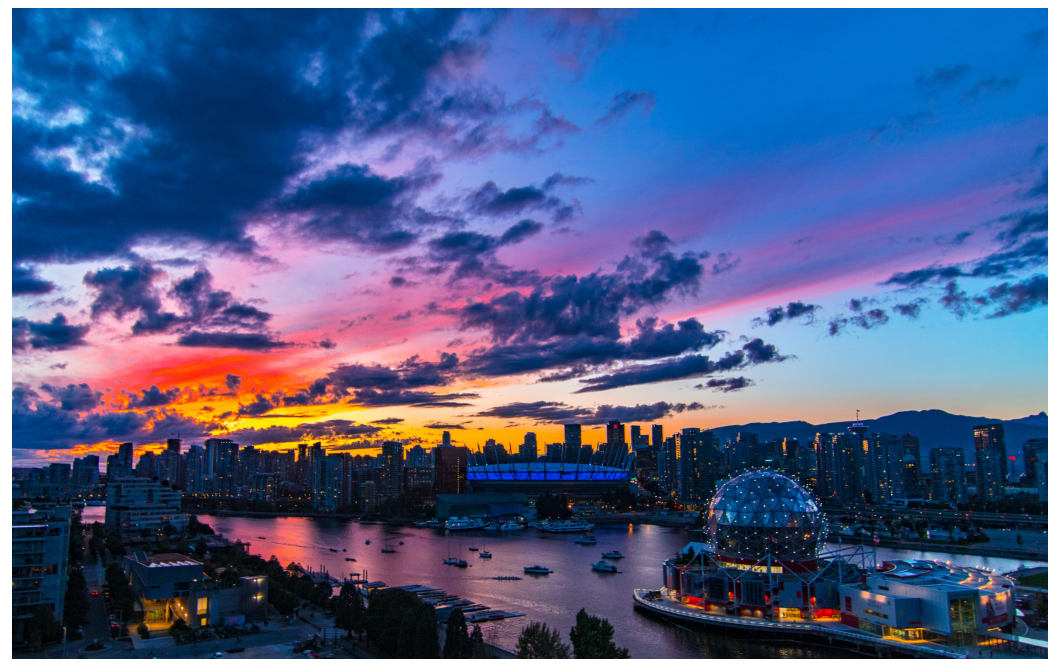

In [2]:
plt.rcParams['figure.figsize'] = (20, 12)
image1 = io.imread('images_datasets/pexels-example1.jpg')
labels = plt.axes(xticks=[], yticks=[])
labels.imshow(image1);

In [34]:
pic = Image.open('images_datasets/pexels-example1.jpg')

In [35]:
pic_load = pic.load()

Image Properties

In [3]:
image1.shape

(2794, 4443, 3)

In [4]:
#number of pixels
image1.size

37241226

In [7]:
length = image1.shape[0]
length

2794

In [8]:
width = image1.shape[1]
rgb = image1.shape[2]

In [23]:
image1.ndim

3

In [26]:
print(image1.max)

<built-in method max of numpy.ndarray object at 0x0000020B12FB3030>


In [25]:
image1.min

<function ndarray.min>

We will reshape this image so that it contains only 2 parameters: product of rows and columns i.e. no. of pixels and no. of channels. We will divide the image size by 255 because that is the maximum intensity value for RGB individually.

In [9]:
image_data = (image1 / 255.0).reshape(length * width, rgb)
image_data.shape

(12413742, 3)

Plot the 3 channels

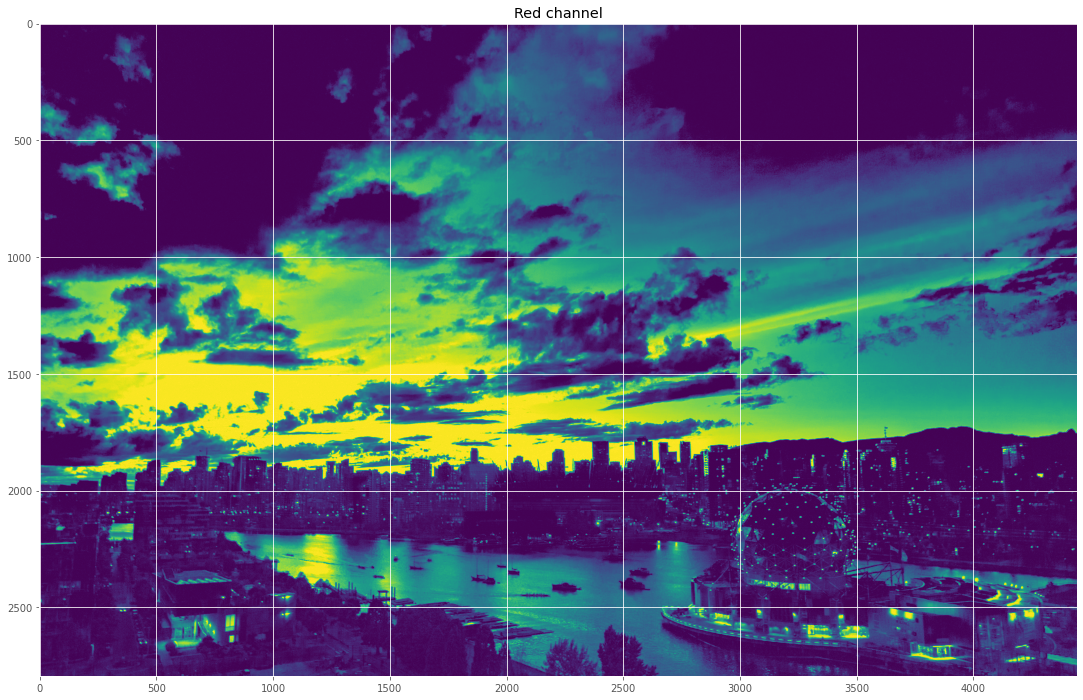

In [27]:
plt.title('Red channel')
plt.imshow(image1[ : , : , 0])
plt.show()

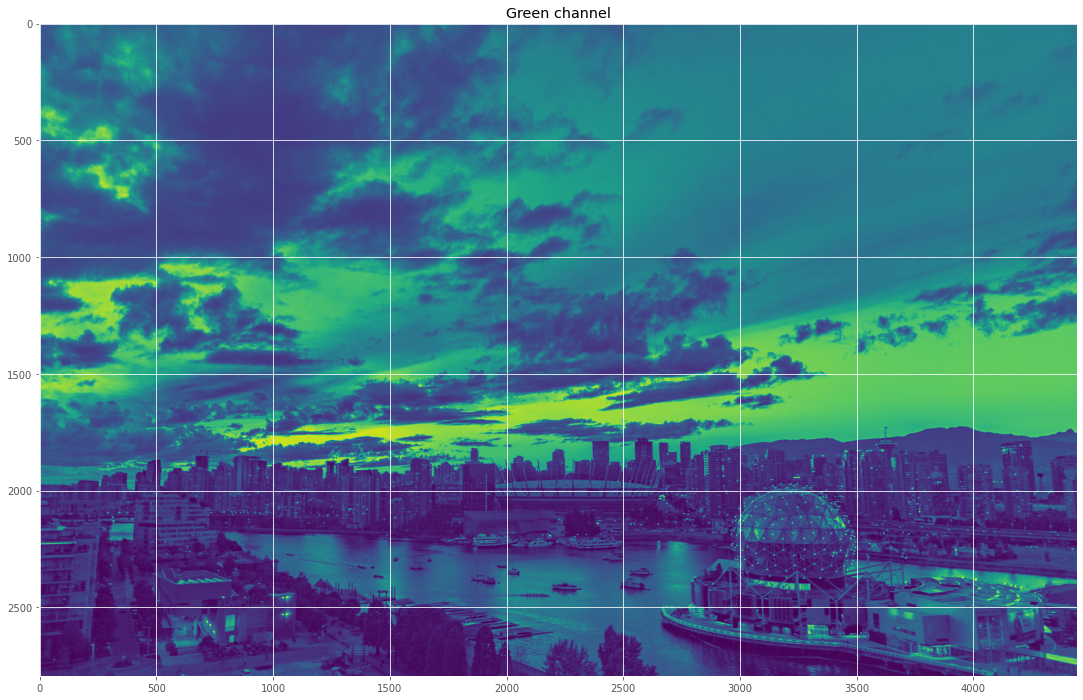

In [28]:
plt.title('Green channel')
plt.imshow(image1[ : , : , 1])
plt.show()

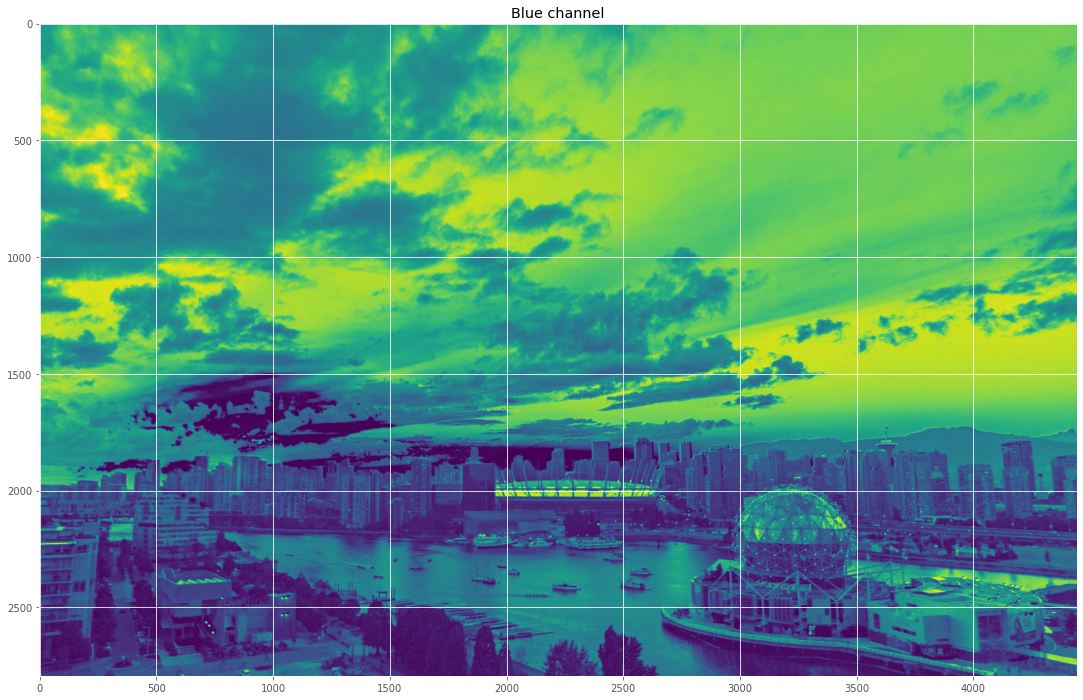

In [29]:
plt.title('Blue channel')
plt.imshow(image1[ : , : , 2])
plt.show()

In [30]:
#pixel at location [150,100]
print('Value of only R channel {}'.format(image1[ 150, 100, 0]))
print('Value of only G channel {}'.format(image1[ 150, 100, 1]))
print('Value of only B channel {}'.format(image1[ 150, 100, 2])) 

Value of only R channel 9
Value of only G channel 96
Value of only B channel 175


Analyze colour space

Plot 3D

In [ ]:
# plot_axis = plt.axes(projection = '3d')

In [59]:
# x = []
# y = []
# z = []
# c = []

In [ ]:
# for row in range(0,pic.height):
#     for col in range(0, pic.width):
#          pix = pic_load[col,row]
#          newCol = (pix[0] / 255, pix[1] / 255, pix[2] / 255)
         
#          if(not newCol in c):
#             x.append(pix[0])
#             y.append(pix[1])
#             z.append(pix[2])
#             c.append(newCol)

In [40]:
# pic.height

2794

In [44]:
# plot_axis.scatter(x,y,z, c = c)
# plt.show()

In [45]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

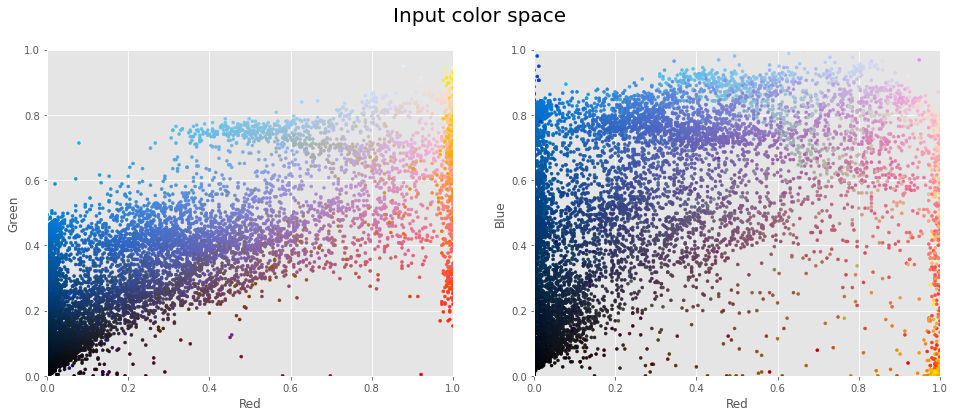

In [46]:
plot_pixels(image_data, title='Input color space')

K Means Clustering

In [52]:
# import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

# from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(3).fit(image_data)
k_colors = kmeans.cluster_centers_[kmeans.predict(image_data)]
# reduced = plot_utils(image_data, colors=k_colors, title="Reduced color space only 160 colors")
# reduced.colorSpace()

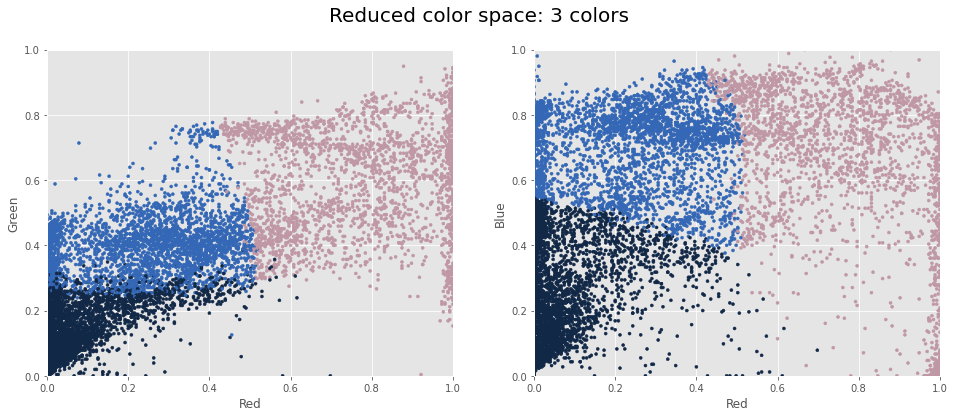

In [53]:
plot_pixels(image_data, colors=k_colors,
            title="Reduced color space: 3 colors")

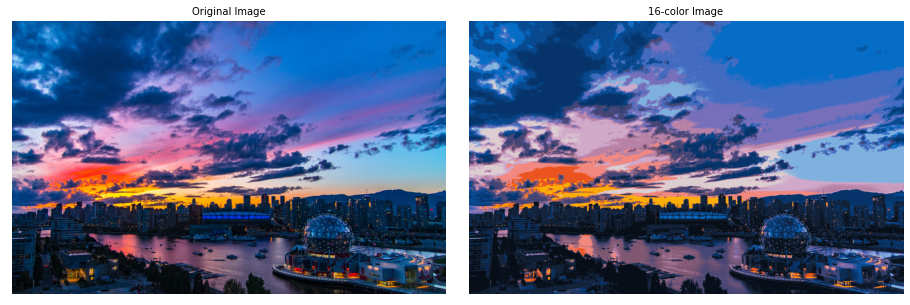

In [49]:
image_recolored = k_colors.reshape(image1.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(image1)
ax[0].set_title('Original Image', size=10)
ax[1].imshow(image_recolored)
ax[1].set_title('16-color Image', size=10);

Compression using Interactive Widgets

In [7]:
#location of image dataset
img_dir = 'images_datasets/'  
@interact
#defining compression function
def compression(image=os.listdir(img_dir), k=IntSlider(min=1, max=256, 
                             step=1,value=160,  continuous_update=False, 
                                         layout=dict(width='100%'))):

                        

   #loading the image and reshaping it as done above
    input_img = io.imread(img_dir + image)
    img_data = (input_img / 255.0).reshape(-1, 3)
  
    #Using K value to create clusters
    kmeans = MiniBatchKMeans(k).fit(img_data)
    k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)]
 
    # Reshaping the image according to the clusters
    k_img = np.reshape(k_colors, (input_img.shape))

    #Plotting the compressed and original image
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle('K-means Image Compressor', fontsize=20)

    ax1.set_title('Compressed Image')
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.imshow(k_img)

    ax2.set_title('Original Image')
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.imshow(input_img)

    plt.subplots_adjust(top=0.85)
    plt.show()

    

interactive(children=(Dropdown(description='image', options=('pexels-bess-hamiti-36764.jpg', 'pexels-bruno-the…

In [ ]:
# import matplotlib
    
    #to save the compressed image to directory
    # matplotlib.image.imsave('Compressed.jpg', k_img)